In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read dataset
file_path = "E:/Uni/Thesis/Material/Dataset/archive/world_development_data_imputed.csv"
data = pd.read_csv(file_path, sep=',')

# Explore the data
print(data.head(5))
print(data.isna().sum())

     Year           Country   Region           SubRegion  SurfAreaSqKm  \
0  2000.0       Afghanistan     Asia       Southern Asia      652860.0   
1  2000.0             Malta   Europe     Southern Europe         320.0   
2  2000.0           Belgium   Europe      Western Europe       30530.0   
3  2000.0  Marshall Islands  Oceania          Micronesia         180.0   
4  2000.0        Mauritania   Africa  Sub-Saharan Africa     1030700.0   

     PopTotal      PopDens  PopGrowth%           GDP  GDPGrowth%  ...  \
0  19542982.0    29.963329    1.443803  1.801248e+10   -5.206288  ...   
1    390087.0  1219.021875    0.645267  4.323339e+09   19.681791  ...   
2  10251250.0   338.548547    0.242518  2.367925e+11    3.716679  ...   
3     54224.0   301.244444    0.721838  1.153475e+08    1.354079  ...   
4   2695003.0     2.614731    2.799182  1.779521e+09   -3.918026  ...   

       GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
0  1.778669e+10    41.312634      17.178

In [3]:
# Preprocess data
asia_data = data[data['Region'] == 'Asia']
asia_data = asia_data.drop(columns=['Year', 'SurfAreaSqKm'])
asia_data = asia_data.select_dtypes(include=[np.number])

# Explore data
print(asia_data.head(5))
print(asia_data.isna().sum())


      PopTotal     PopDens  PopGrowth%           GDP  GDPGrowth%  \
0   19542982.0   29.963329    1.443803  1.801248e+10   -5.206288   
10   2450979.0    1.583894    0.921870  1.136896e+09    1.146062   
15  45538332.0   69.679487    1.096713  6.849322e+09   12.418192   
19    282507.0  941.690000    1.568301  6.243371e+08    3.845810   
21   5430853.0   23.530559    1.686007  1.731198e+09    5.798782   

    AdolFertRate  AgriValAdd%GDP  Exports%GDP  FertRate     FDINetBoP  ...  \
0        152.572       33.096776    13.315247     7.534  1.700000e+05  ...   
10        27.173       27.422531    53.996751     2.255  5.369700e+07  ...   
15        39.351        0.629898    65.686369     2.785  2.547898e+08  ...   
19        31.100        0.511755    61.741034     2.710  2.231245e+07  ...   
21       100.814       33.630251    30.662004     4.400  3.389000e+07  ...   

        GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
0   1.778669e+10    41.312634      17.178775 

PopGrowth%         1.000000
UrbanPopGrowth%    0.906819
NetMigr            0.360343
FertRate           0.258145
GNI/CapAtlas       0.223239
IndValAdd%GDP      0.135650
GDPGrowth%         0.119562
Exports%GDP        0.087773
LifeExpBirth       0.042555
AdolFertRate       0.038142
MobileSubs/100     0.031467
MerchTrade%GDP     0.024346
Imports%GDP        0.000532
InflConsPric%     -0.001617
MortRateU5        -0.006931
PopDens           -0.007320
PopTotal          -0.111274
AgriValAdd%GDP    -0.131772
FDINetBoP         -0.133812
GDP               -0.145719
GNIAtlas          -0.147974
Name: PopGrowth%, dtype: float64


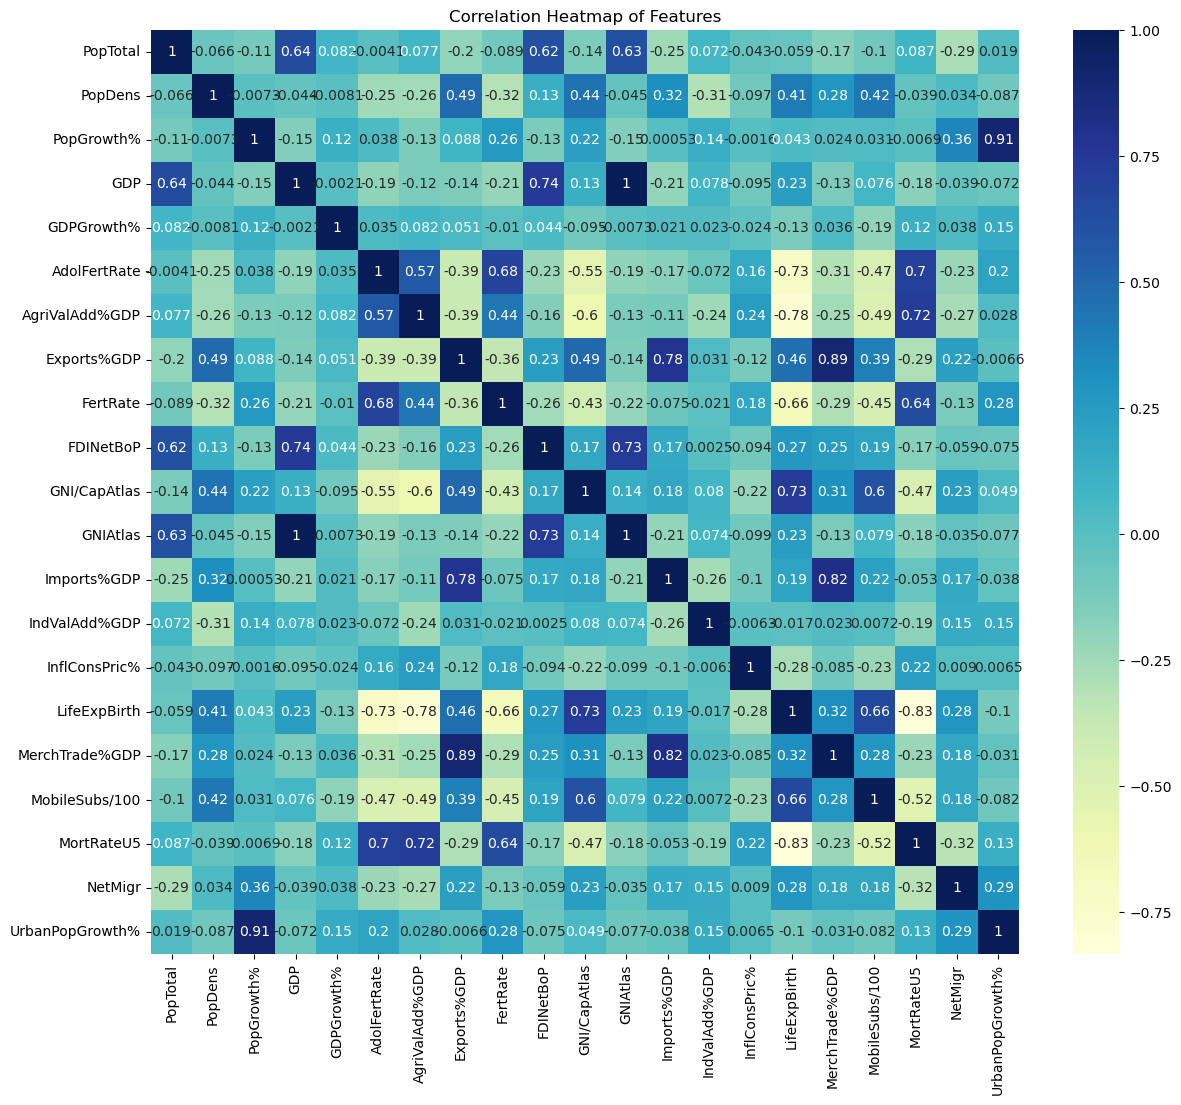

In [5]:
# Compute correlation matrix
asia_data_corr = asia_data.corr()
print(asia_data_corr['PopGrowth%'].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(asia_data_corr, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap of Features")
plt.savefig("Featurs_Correlation.png", dpi=300, bbox_inches='tight')
plt.show()

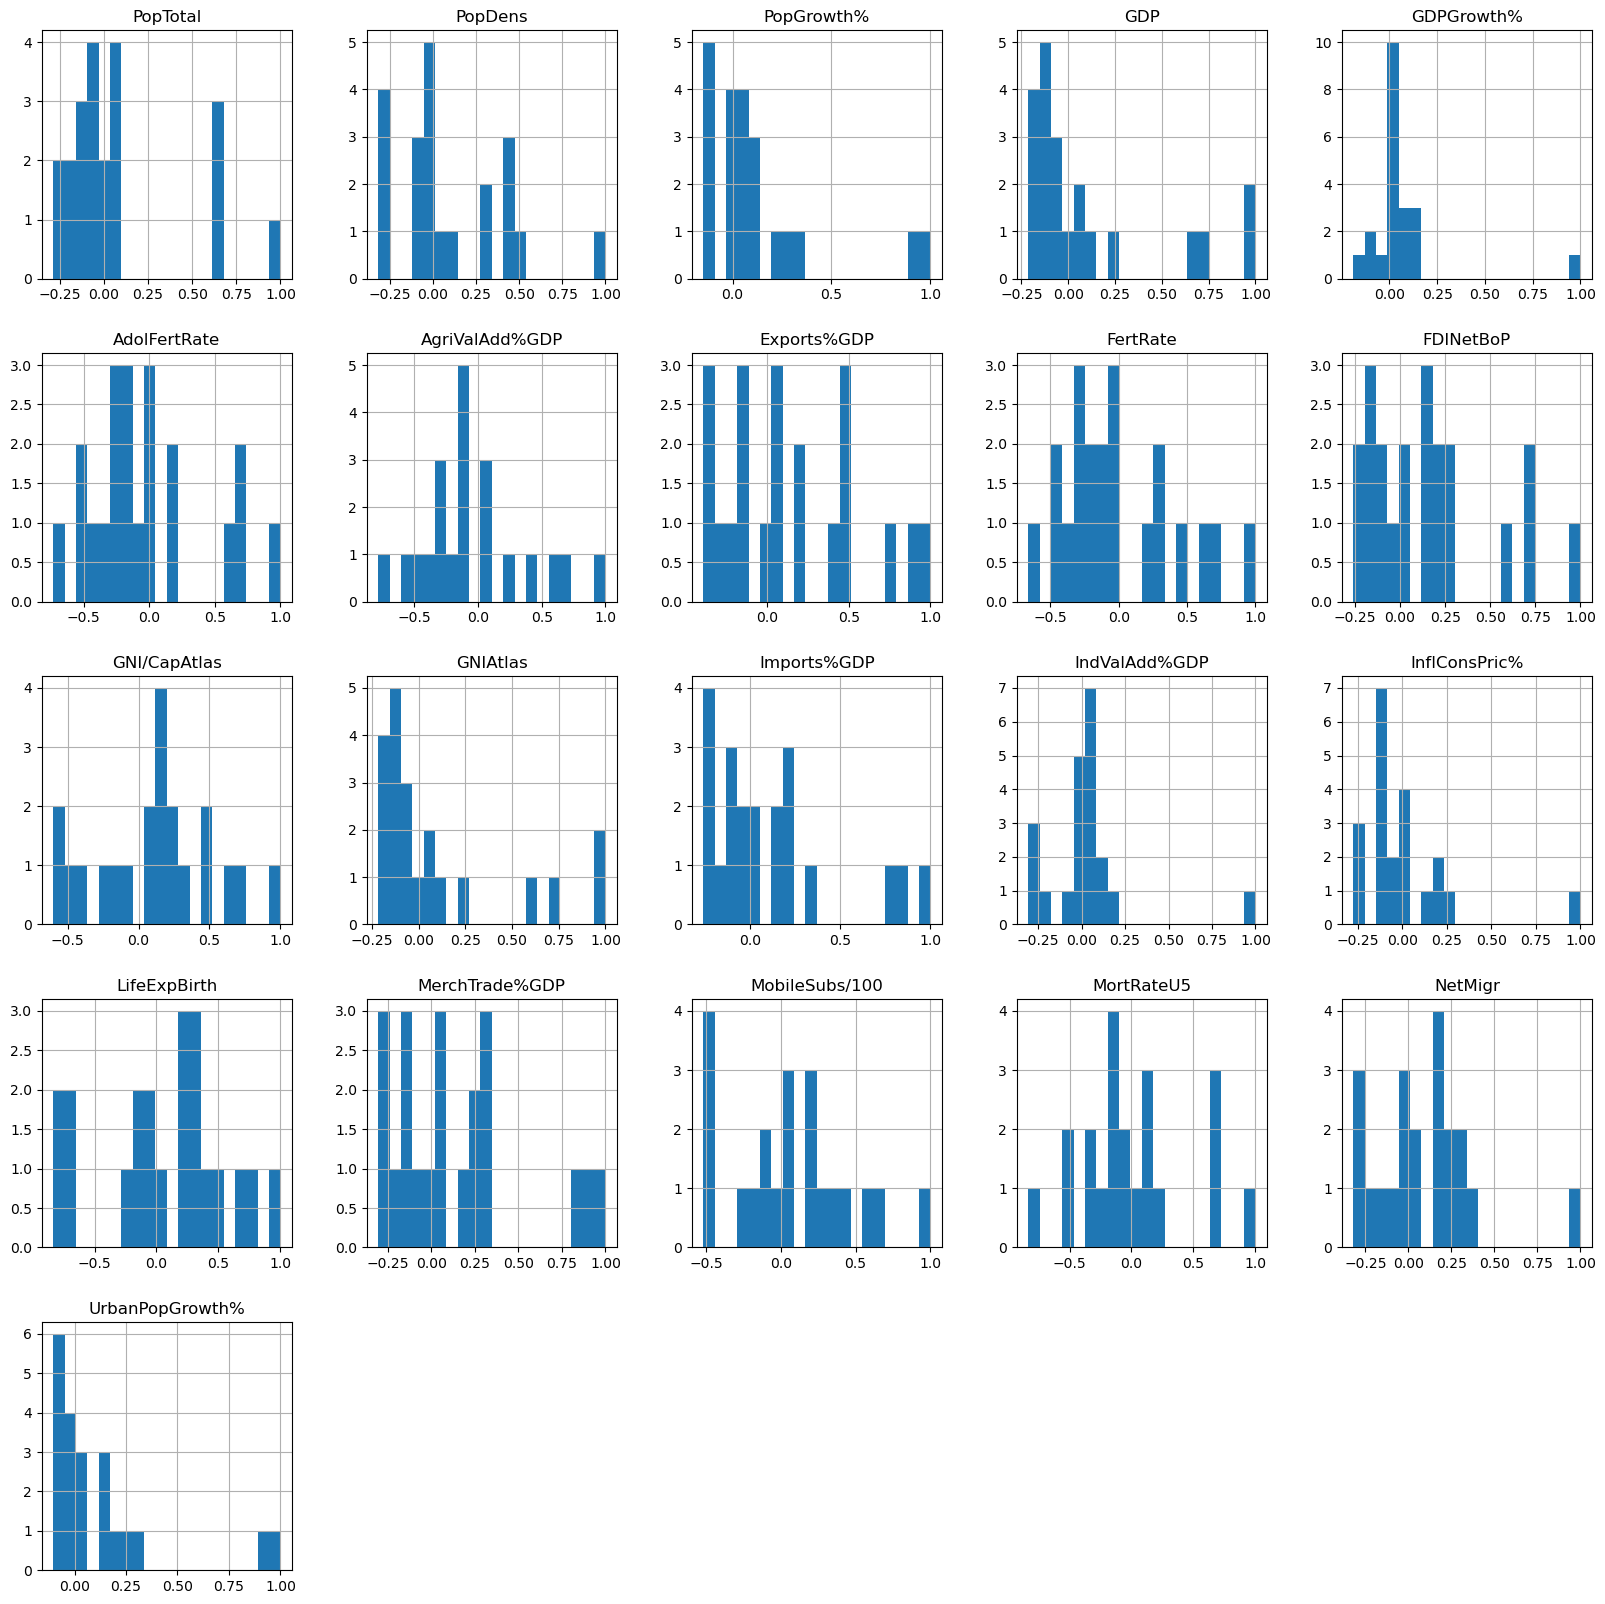

In [6]:
# Plot histograms
asia_data_corr.hist(figsize=(20, 20), bins=20)
plt.title("Features Histograms")
plt.savefig("Features_His.png")
plt.show()

C:\Users\nazno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


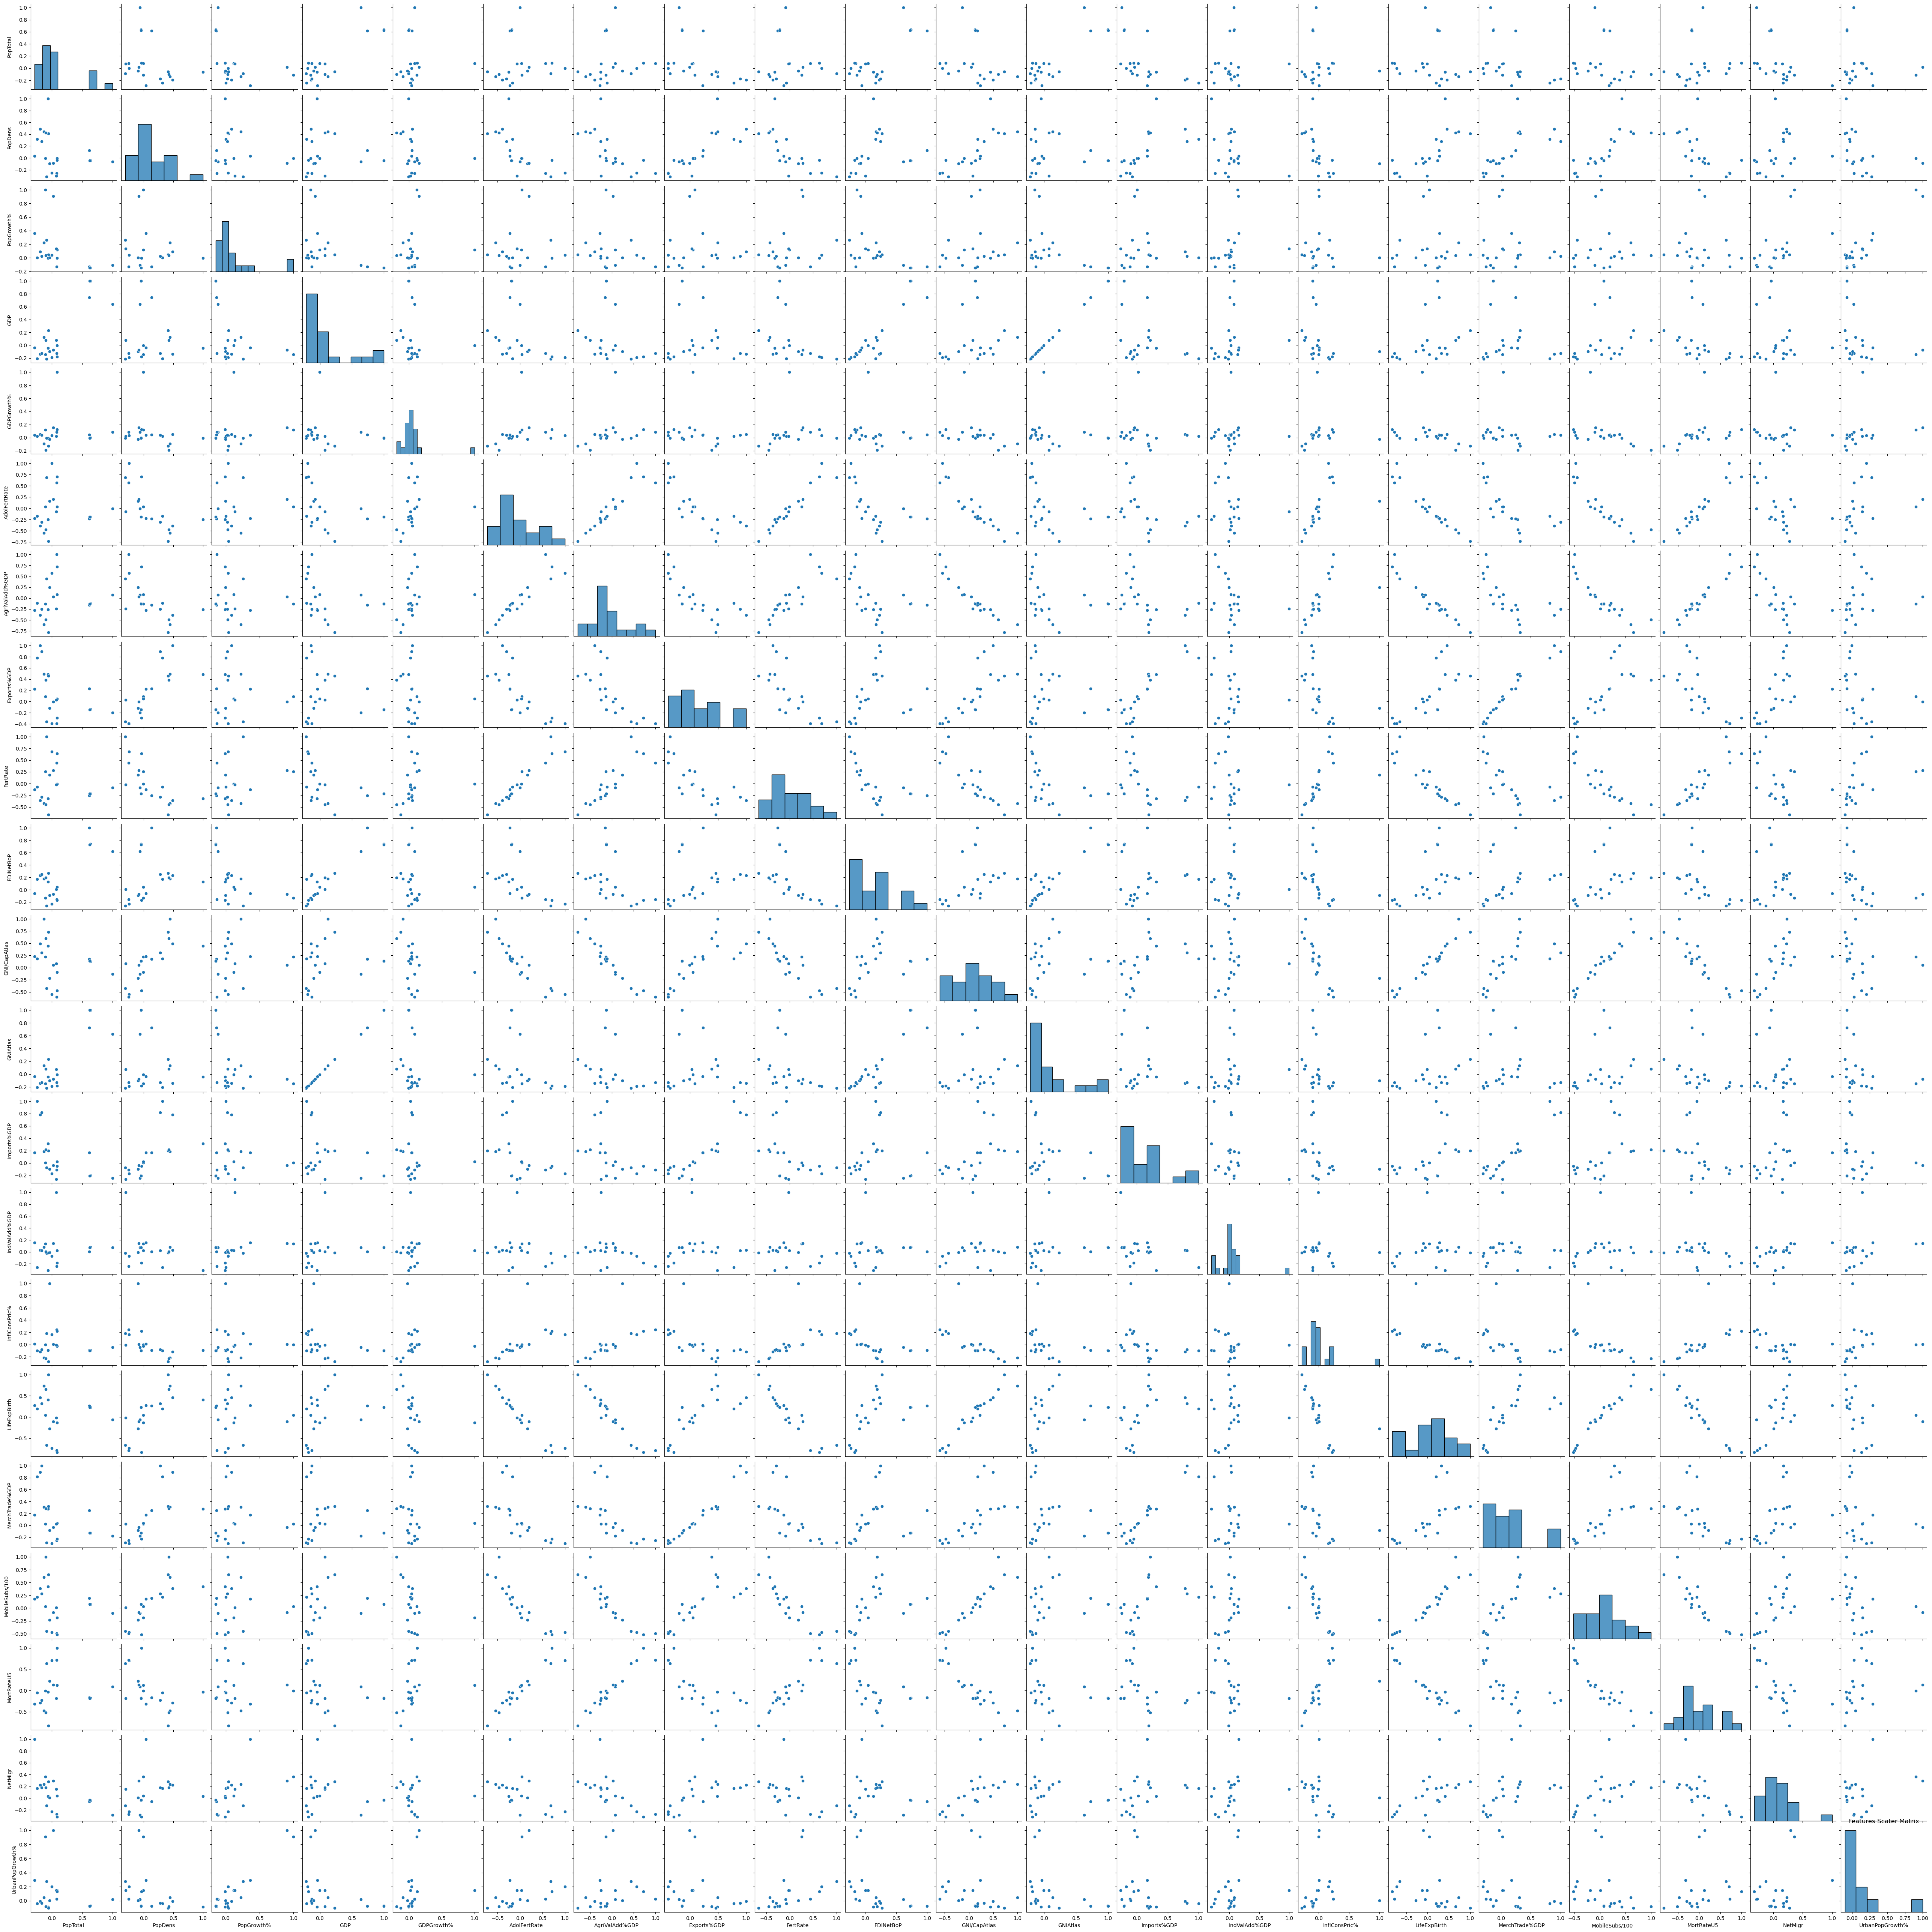

In [7]:
#Plot scatter matrix
sns.pairplot(asia_data_corr)
plt.title("Features Scater Matrix")
plt.savefig("Features_Scat.png", dpi = 300, bbox_inches = 'tight')
plt.show()

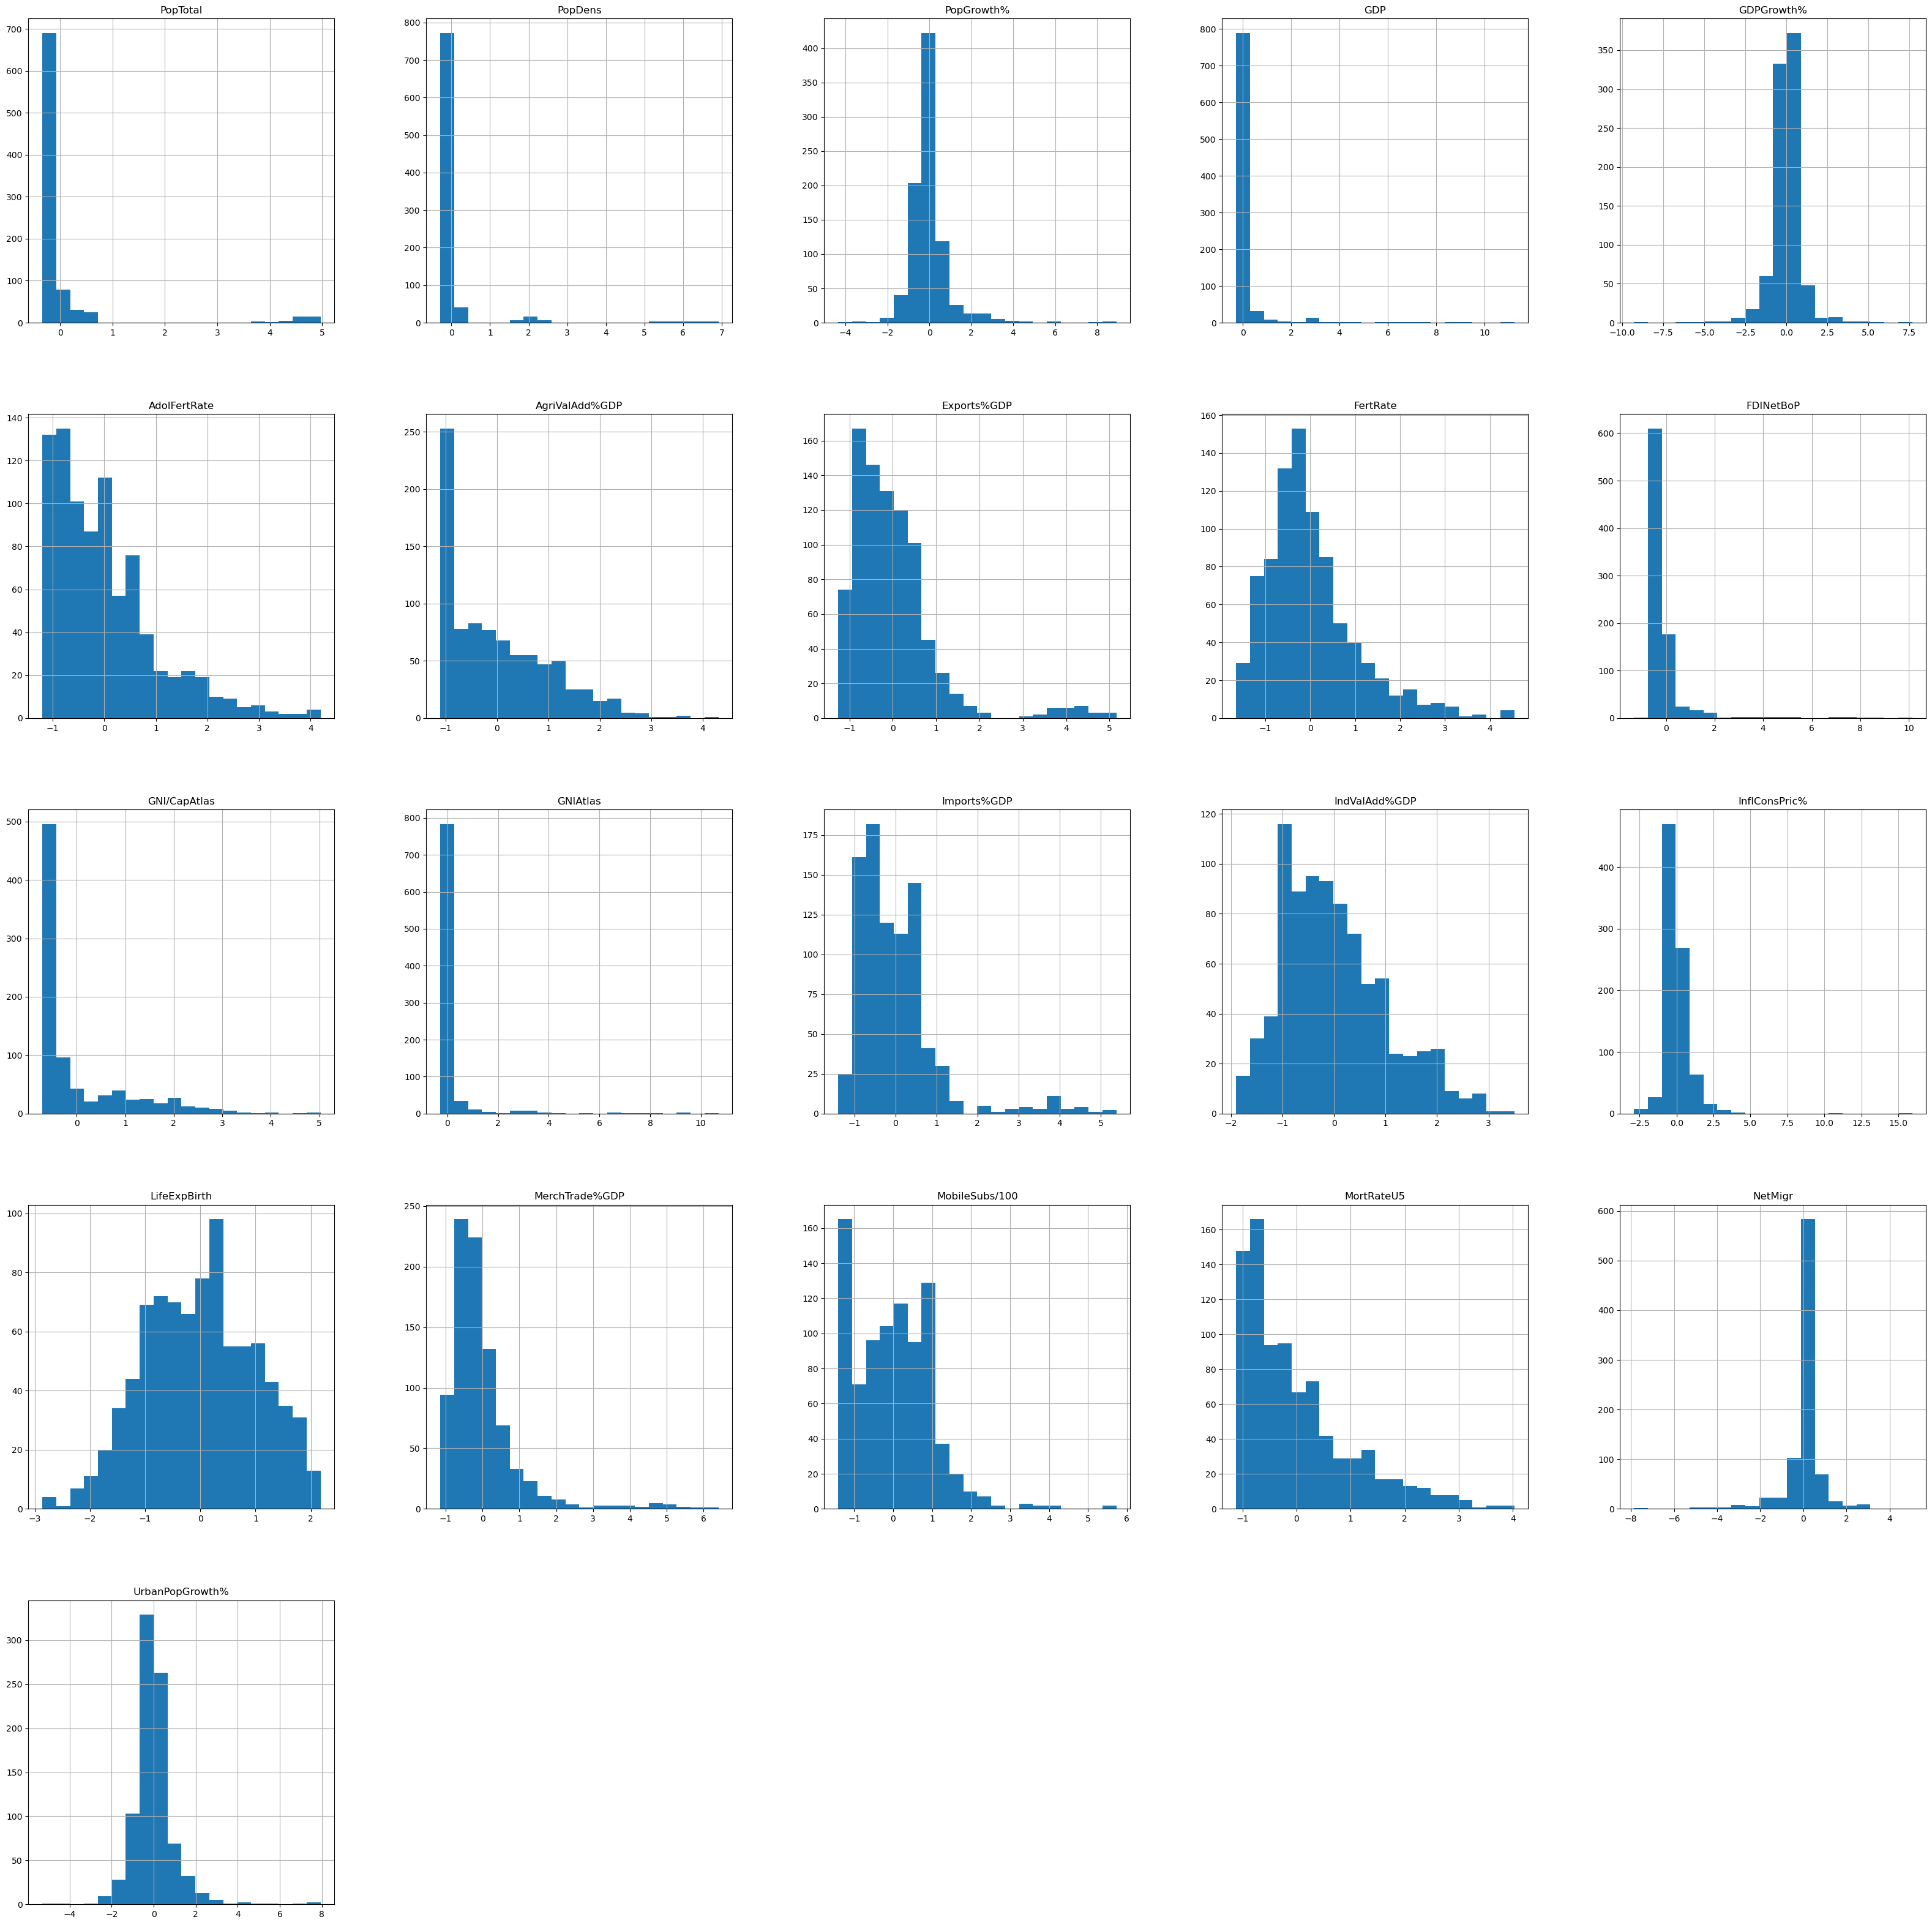

In [8]:
#Split data
train_set, test_set = train_test_split(asia_data, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_set = pd.DataFrame(scaler.fit_transform(train_set), columns=train_set.columns)
test_set = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)

#Normalize the features
scalered_train_set=scaler.fit_transform(train_set)
scalered_test_set=scaler.transform(test_set)

#Visualize the normalized features
train_set.hist(bins=20,figsize=(40,40))
plt.savefig("Normalized_Features.png")
plt.show()

In [9]:
# Split data into features and target
X_train = train_set.drop(columns=['PopGrowth%'])
y_train = train_set['PopGrowth%']
X_test = test_set.drop(columns=['PopGrowth%'])
y_test = test_set['PopGrowth%']

In [10]:
# Define and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for name, model in models.items():
    kFold = KFold(n_splits=10, shuffle=True, random_state=42)
    r2_scores = cross_val_score(model, X_train, y_train, cv=kFold, scoring='r2', error_score='raise')
    mse_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_absolute_error')
    print(f"{name}:")
    print("Cross-validation R^2 scores:", r2_scores)
    print("Mean R^2:", np.mean(r2_scores))
    print("Cross-validation MSE scores:", mse_scores)
    print("Mean MSE:", np.mean(mse_scores))
    print("Cross_validation MAE scores:", mae_scores)
    print("Mean MAE:", np.mean(mae_scores))
    print("\n")

Linear Regression:
Cross-validation R^2 scores: [0.87279147 0.78233812 0.69819271 0.93783277 0.55982447 0.90990656
 0.92039038 0.95380781 0.87776534 0.84068225]
Mean R^2: 0.8353531874371537
Cross-validation MSE scores: [0.15240315 0.11160814 0.10922417 0.07574833 0.13353282 0.12639584
 0.11710738 0.09689194 0.07338343 0.11351786]
Mean MSE: 0.11098130675037195
Cross_validation MAE scores: [0.28628945 0.2495484  0.24772807 0.21130252 0.25348394 0.25625757
 0.25369815 0.22304067 0.20418166 0.24576151]
Mean MAE: 0.24312919462888333


Support Vector Regression:
Cross-validation R^2 scores: [0.88724021 0.73395736 0.91520826 0.68577892 0.6051697  0.74650181
 0.67957528 0.70492048 0.89753951 0.95257026]
Mean R^2: 0.7808461770891533
Cross-validation MSE scores: [0.13509273 0.13641582 0.03068616 0.38286604 0.11977677 0.35564319
 0.47135133 0.61895374 0.06151204 0.03379487]
Mean MSE: 0.2346092679528074
Cross_validation MAE scores: [0.16013059 0.17435784 0.11501777 0.17475314 0.14901654 0.247773
 

In [11]:
#Tese set performance
performance_results = {}
for name, model in models.items():
    # Fit the model to the entire training set
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Calculate and print the R^2 score, MSE and MAE for the test set
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the performance metrics
    performance_results[name] = {'R2 Score': r2, 'MSE': mse, 'MAE': mae}

# Sort the models based on R^2 score
sorted_models = sorted(performance_results.items(), key=lambda x: x[1]['R2 Score'], reverse=True)

print("Model Rankings based on R^2 Score:")
for idx, (model_name, metrics) in enumerate(sorted_models, start=1):
    print(f"{idx}. {model_name}: R^2 Score = {metrics['R2 Score']:.4f}, MSE = {metrics['MSE']:.4f}, MAE = {metrics['MAE']:.4f}")

Model Rankings based on R^2 Score:
1. Random Forest Regressor: R^2 Score = 0.9832, MSE = 0.0213, MAE = 0.0815
2. XGBoost: R^2 Score = 0.9747, MSE = 0.0321, MAE = 0.0945
3. Linear Regression: R^2 Score = 0.9336, MSE = 0.0843, MAE = 0.2202
4. Support Vector Regression: R^2 Score = 0.8609, MSE = 0.1766, MAE = 0.1627


Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.843285
7          FertRate    0.034704
5    AgriValAdd%GDP    0.023145
9      GNI/CapAtlas    0.022794
18          NetMigr    0.018714
17       MortRateU5    0.007712
1           PopDens    0.006867
0          PopTotal    0.005894
12    IndValAdd%GDP    0.004923
2               GDP    0.004840
8         FDINetBoP    0.003901
14     LifeExpBirth    0.003639
15   MerchTrade%GDP    0.003466
10         GNIAtlas    0.003194
16   MobileSubs/100    0.002945
3        GDPGrowth%    0.002653
4      AdolFertRate    0.002086
6       Exports%GDP    0.002005
11      Imports%GDP    0.001825
13    InflConsPric%    0.001407


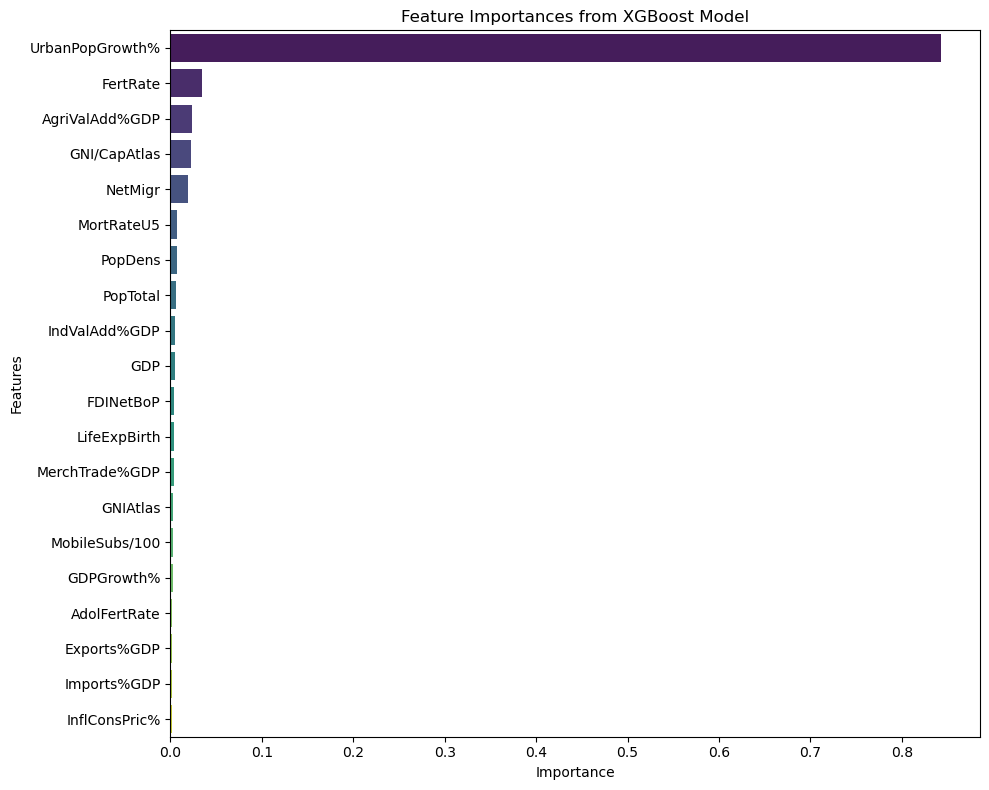

In [12]:
# Fit the model to the entire training set
best_model = models[sorted_models[0][0]]  # Select the best performing model
best_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title('Feature Importances from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Feature Importances from XGBoost Model.png")
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Best cross-validation score (MSE):  0.03827898236978949


In [14]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test R^2 Score: ", r2)

Test MSE:  0.028591802846167018
Test R^2 Score:  0.9774778768958129


In [15]:
# Extract feature importancesi
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.618129
7          FertRate    0.060309
18          NetMigr    0.055245
5    AgriValAdd%GDP    0.053748
0          PopTotal    0.047696
9      GNI/CapAtlas    0.035155
17       MortRateU5    0.028180
2               GDP    0.025850
14     LifeExpBirth    0.013992
8         FDINetBoP    0.012251
10         GNIAtlas    0.011834
1           PopDens    0.006387
12    IndValAdd%GDP    0.005900
3        GDPGrowth%    0.005203
4      AdolFertRate    0.005083
6       Exports%GDP    0.004999
16   MobileSubs/100    0.002688
13    InflConsPric%    0.002650
11      Imports%GDP    0.002634
15   MerchTrade%GDP    0.002067


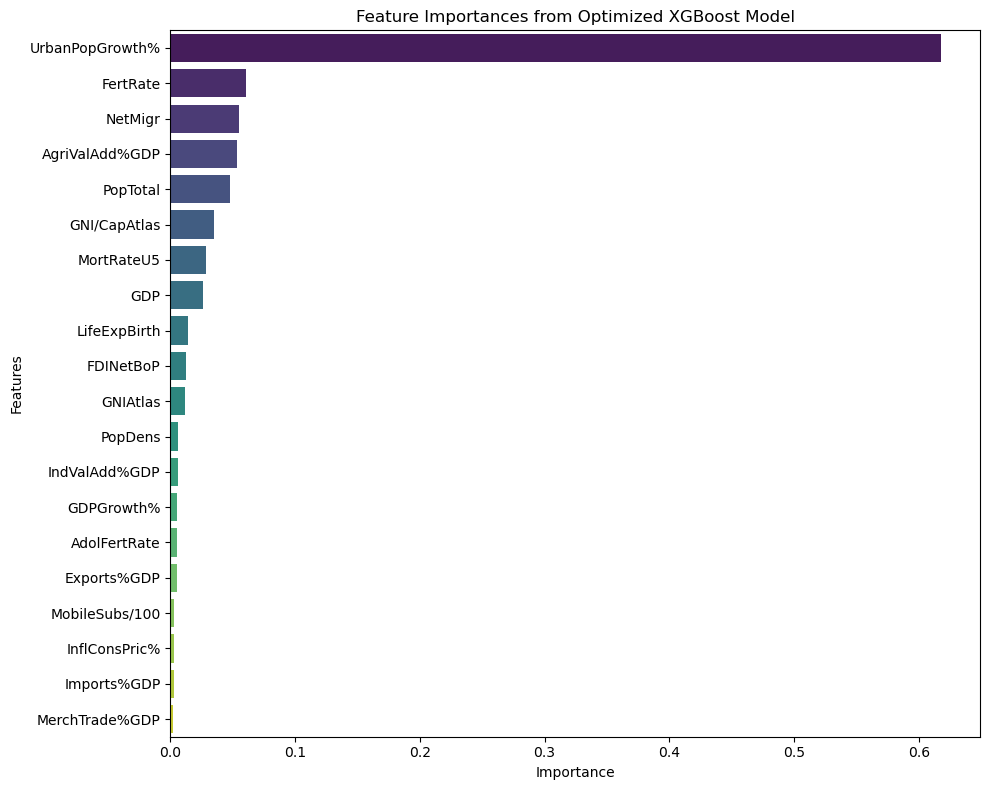

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'importance_df' is already defined and sorted as you described
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title('Feature Importances from Optimized XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Optimized_Feature_Importances.png")
plt.show()

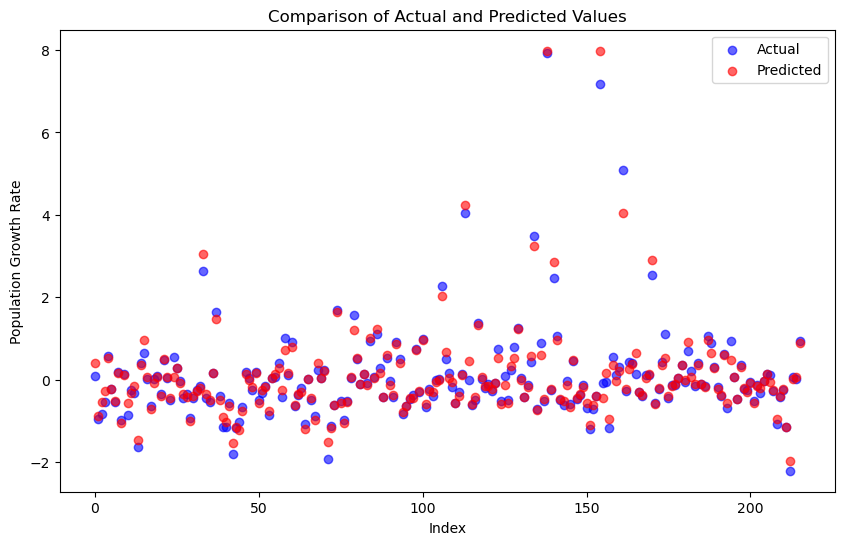

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the test set with the optimized model
y_pred_optimized = best_model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(np.arange(len(y_pred_optimized)), y_pred_optimized, color='red', label='Predicted', alpha=0.6)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Population Growth Rate')
plt.legend()
plt.savefig("Comparison_of_Actual_and_Predicted_Values.png")
plt.show()